In [23]:
# Importing Required  Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [24]:
df=pd.read_csv('kickstarter.csv')

In [3]:
df.head(5)

,currency,deadline,launched,state,backers,country,usd_pledged,usd_goal,duration,backer_goal,...,GDP per capita (currency US$),employment rate,inflation rate,usd_goal_iqr,usd_goal_transformed,usd_pledged_transformed,backers_transformed,backer_goal_transformed,days_transformed,duration_transformed
0,USD,2017-01-11,2017-02-09,failed,15,US,2421.0,30000.0,60,2000,...,65840.0,70.11017,2.130110,28336.4125,8.624656,13.323201,3.210250,7.600902,7.745967,7.745967
1,USD,2015-08-29,2015-04-07,failed,14,US,1283.0,19500.0,56,1393,...,59320.0,68.70962,0.118627,19500.0000,8.361223,11.678974,3.114581,7.239215,7.483315,7.483315
2,USD,2016-03-17,2016-01-02,failed,40,US,453.0,25000.0,45,625,...,62440.0,69.35136,1.261583,25000.0000,8.536737,9.254794,4.661344,6.437752,6.708204,6.708204
3,USD,2013-08-04,2013-09-03,successful,100,US,12700.0,12500.0,30,125,...,53920.0,67.35994,1.464833,12500.0000,8.043287,18.296764,6.183543,4.828314,5.477226,5.477226
4,USD,2015-02-28,2015-01-29,failed,11,US,664.0,2500.0,30,227,...,59320.0,68.70962,0.118627,2500.0000,6.850638,10.108126,2.786441,5.424950,5.477226,5.477226


# Dropping redundant columns

In [25]:
columns_to_drop = ['deadline', 'launched', 'days_transformed', 'currency']
df = df.drop(columns=columns_to_drop)

# Converting Datatypes as required

In [26]:
columns_to_convert = ['state', 'country', 'Major Cat', 'quarter', 'year']
df[columns_to_convert] = df[columns_to_convert].astype('category')

In [27]:
df.dtypes

state                            category
backers                             int64
country                          category
usd_pledged                       float64
usd_goal                          float64
duration                            int64
backer_goal                         int64
year                             category
quarter                          category
Major Cat                        category
GDP per capita (currency US$)     float64
employment rate                   float64
inflation rate                    float64
usd_goal_iqr                      float64
usd_goal_transformed              float64
usd_pledged_transformed           float64
backers_transformed               float64
backer_goal_transformed           float64
duration_transformed              float64
dtype: object

# Base line model

In [9]:
# Step 1: Import necessary libraries and load your dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Step 2: Data Preprocessing
# Encode categorical variables using LabelEncoder
categorical_columns = ['country', 'year', 'quarter', 'Major Cat', 'state']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Step 3: Split the dataset into features (X) and the target variable (y)
X = df[['backers', 'country', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 'year', 'quarter', 'Major Cat', 'GDP per capita (currency US$)', 'employment rate', 'inflation rate']]
y = df['state']

# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build and train a Logistic Regression model as the base model
logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)
logistic_classifier.fit(X_train, y_train)

# Step 6: Make predictions on the test data
y_pred = logistic_classifier.predict(X_test)


In [10]:
# Step 7: Evaluate the model and print the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:,1])

print("Train Accuracy: {:.2f}".format(logistic_classifier.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("ROC AUC Score: {:.2f}".format(roc_auc))


Train Accuracy: 0.99
Test Accuracy: 1.00
Precision: 0.99
Recall: 1.00
ROC AUC Score: 1.00


Learning curves are a great way to visualize how a model's performance changes as the size of the training dataset increases. They help you understand whether your model is overfitting or underfitting

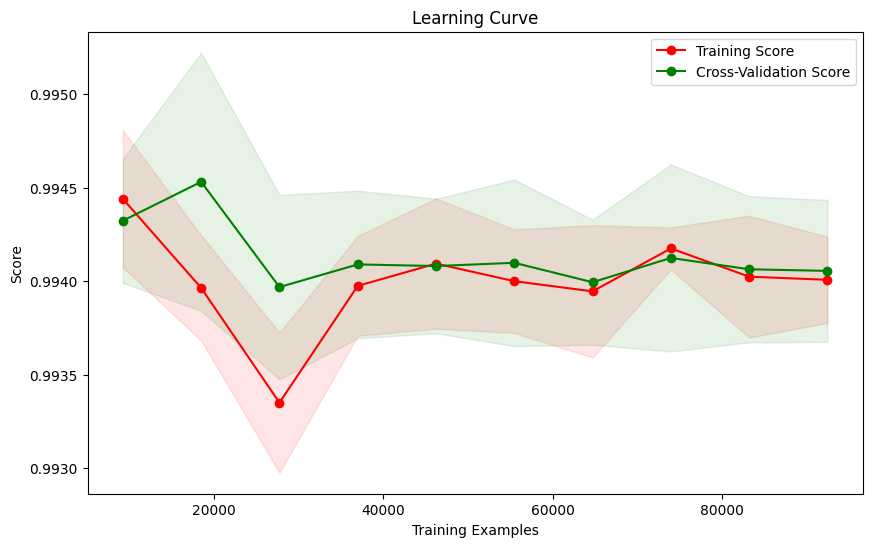

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, cv, train_sizes, scoring):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")
    
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.title("Learning Curve")
    plt.show()

# Assuming you already have X_train and y_train
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
train_sizes = np.linspace(0.1, 1.0, 10)  # Vary the training dataset size from 10% to 100%
scoring = 'accuracy'  # You can use other scoring metrics like 'precision', 'recall', etc.

logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)
plot_learning_curve(logistic_classifier, X_train, y_train, cv, train_sizes, scoring)


In [42]:
# Encode categorical variables using LabelEncoder
categorical_columns = [ 'state']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features (X) and the target variable (y)
X = df[['backers', 'country', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 'inflation rate']]
y = df['state']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
logistic_classifier = LogisticRegression(random_state=42, max_iter=1000)
logistic_classifier.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [45]:
y_pred = logistic_classifier.predict(X_test)


In [46]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, logistic_classifier.predict_proba(X_test)[:, 1])

print("Train Accuracy: {:.2f}".format(logistic_classifier.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("ROC AUC Score: {:.2f}".format(roc_auc))


Train Accuracy: 0.99
Test Accuracy: 1.00
Precision: 0.99
Recall: 1.00
ROC AUC Score: 1.00


# Base model is overfit model

# Multicollinearity check

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

numerical_columns = ['backers', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal',
                     'GDP per capita (currency US$)', 'employment rate', 'inflation rate',
                     'usd_goal_iqr', 'usd_goal_transformed', 'usd_pledged_transformed',
                     'backers_transformed', 'backer_goal_transformed', 'duration_transformed']

numerical_data = df[numerical_columns]

# Calculate VIF for each numerical column
vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

print(vif_data)

                          feature           VIF
0                         backers     47.258951
1                     usd_pledged     15.196797
2                        usd_goal    236.125426
3                        duration    376.144422
4                     backer_goal      5.650071
5   GDP per capita (currency US$)     89.252441
6                 employment rate    757.101595
7                  inflation rate      5.123107
8                    usd_goal_iqr    255.069392
9            usd_goal_transformed  46233.339886
10        usd_pledged_transformed    209.418624
11            backers_transformed   7148.173165
12        backer_goal_transformed  14521.815626
13           duration_transformed   1492.987068


In [37]:
numerical_columns =  ['GDP per capita (currency US$)', 'employment rate', 'inflation rate',
                     'usd_goal_transformed', 'usd_pledged_transformed',
                     'backers_transformed', 'backer_goal_transformed', 'duration_transformed']
numerical_data = df[numerical_columns]

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

print(vif_data)

                         feature          VIF
0  GDP per capita (currency US$)    86.806355
1                employment rate   467.821483
2                 inflation rate     4.999319
3           usd_goal_transformed  9190.977616
4        usd_pledged_transformed    71.741911
5            backers_transformed   921.896976
6        backer_goal_transformed  2377.235236
7           duration_transformed    36.485158


In [42]:
numerical_columns =  [ 'inflation rate',
                     'usd_goal', 'usd_pledged_transformed',
                     'backers_transformed', 'backer_goal_transformed', 'duration_transformed']
numerical_data = df[numerical_columns]

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

print(vif_data)

                   feature        VIF
0           inflation rate   4.741118
1                 usd_goal   3.700992
2  usd_pledged_transformed  70.902721
3      backers_transformed  49.515717
4  backer_goal_transformed  30.503998
5     duration_transformed  35.059656


In [47]:
numerical_columns = ['backers', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 'inflation rate','GDP per capita (currency US$)','employment rate']
numerical_data = df[numerical_columns]

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

print(vif_data)

                         feature         VIF
0                        backers    4.843233
1                    usd_pledged    4.849055
2                       usd_goal    4.111994
3                       duration    8.952437
4                    backer_goal    2.786691
5                 inflation rate    4.801678
6  GDP per capita (currency US$)   84.397856
7                employment rate  104.039619


In [48]:
numerical_columns = ['backers', 'usd_pledged', 'usd_goal', 'duration', 'backer_goal', 'inflation rate']
numerical_data = df[numerical_columns]

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_data.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_data.values, i) for i in range(numerical_data.shape[1])]

print(vif_data)

          feature       VIF
0         backers  4.572461
1     usd_pledged  4.838093
2        usd_goal  4.090317
3        duration  4.943247
4     backer_goal  2.689284
5  inflation rate  3.768518


# Forward -Feature Selection

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select relevant columns
selected_columns = ['backers', 'usd_goal', 'duration', 'backer_goal', 'inflation rate',
                    'employment rate', 'GDP per capita (currency US$)', 'Major Cat',
                    'year', 'quarter', 'country', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'quarter', 'country'])

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize an empty list to store selected features
selected_features = []
best_accuracy = 0

# Forward feature selection loop
while len(selected_features) < len(X.columns):
    best_feature = None
    for feature in X.columns:
        if feature not in selected_features:
            features_to_try = selected_features + [feature]
            
            # Fit a logistic regression model
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train[features_to_try], y_train)
            
            # Evaluate the model on the test set
            y_pred = model.predict(X_test[features_to_try])
            accuracy = accuracy_score(y_test, y_pred)
            
            # Check if this feature improves accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature
    
    if best_feature is None:
        break
    
    selected_features.append(best_feature)
    print(f"Selected feature: {best_feature}, Accuracy: {best_accuracy:.4f}")

print("Final selected features:", selected_features)

Selected feature: backer_goal, Accuracy: 0.8652
Selected feature: Major Cat_Film, Video & Theater, Accuracy: 0.8706
Selected feature: Major Cat_Music & Performance, Accuracy: 0.8748
Selected feature: backers, Accuracy: 0.8775
Selected feature: Major Cat_Gaming & Entertainment, Accuracy: 0.8802
Selected feature: Major Cat_Technology & Gadgets, Accuracy: 0.8808
Selected feature: employment rate, Accuracy: 0.8813
Selected feature: Major Cat_Community & Civic Projects, Accuracy: 0.8819
Selected feature: country_US, Accuracy: 0.8820
Selected feature: quarter_1, Accuracy: 0.8821
Final selected features: ['backer_goal', 'Major Cat_Film, Video & Theater', 'Major Cat_Music & Performance', 'backers', 'Major Cat_Gaming & Entertainment', 'Major Cat_Technology & Gadgets', 'employment rate', 'Major Cat_Community & Civic Projects', 'country_US', 'quarter_1']


# Backward-Feature Selection

In [74]:
selected_columns = ['backers', 'usd_goal', 'duration', 'backer_goal', 'inflation rate',
                    'employment rate', 'GDP per capita (currency US$)', 'Major Cat',
                    'year', 'quarter', 'country', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'quarter', 'country'])

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize all features as selected
selected_features = list(X.columns)
best_accuracy = 0

# Backward feature selection loop
while len(selected_features) > 1:
    worst_feature = None
    for feature in selected_features:
        features_to_try = selected_features.copy()
        features_to_try.remove(feature)
        
        # Fit a logistic regression model
        model = LogisticRegression(max_iter=1000)
        model.fit(X_train[features_to_try], y_train)
        
        # Evaluate the model on the test set
        y_pred = model.predict(X_test[features_to_try])
        accuracy = accuracy_score(y_test, y_pred)
        
        # Check if removing this feature improves accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            worst_feature = feature
    
    if worst_feature is None:
        break
    
    selected_features.remove(worst_feature)
    print(f"Removed feature: {worst_feature}, Accuracy: {best_accuracy:.4f}")

print("Final selected features:", selected_features)

Removed feature: GDP per capita (currency US$), Accuracy: 0.8792
Removed feature: year, Accuracy: 0.8817
Removed feature: Major Cat_Fashion & Apparel, Accuracy: 0.8817
Removed feature: duration, Accuracy: 0.8822
Final selected features: ['backers', 'usd_goal', 'backer_goal', 'inflation rate', 'employment rate', 'Major Cat_Arts & Crafts', 'Major Cat_Community & Civic Projects', 'Major Cat_Film, Video & Theater', 'Major Cat_Food & Beverage', 'Major Cat_Gaming & Entertainment', 'Major Cat_Miscellaneous', 'Major Cat_Music & Performance', 'Major Cat_Publishing & Literature', 'Major Cat_Technology & Gadgets', 'quarter_1', 'quarter_2', 'quarter_3', 'quarter_4', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_DE', 'country_FR', 'country_GB', 'country_IE', 'country_IT', 'country_JP', 'country_NZ', 'country_SE', 'country_US']


# Logistic Classification Model

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a logistic regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8819619924538752


In [53]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate recall and precision
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

# Display recall and precision percentages
print("Recall:", recall * 100)
print("Precision:", precision * 100)

Recall: 92.51424454777654
Precision: 86.1709266150186


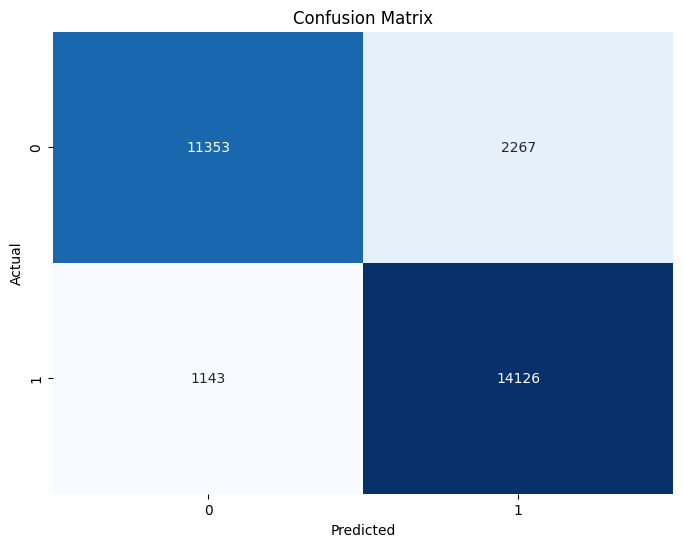

In [50]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [55]:
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC AUC Score: {:.2f}".format(roc_auc))

ROC AUC Score: 0.50


# KNN Model

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8705735747170203


In [61]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.8703108941418294
Recall: 0.8873534612613793


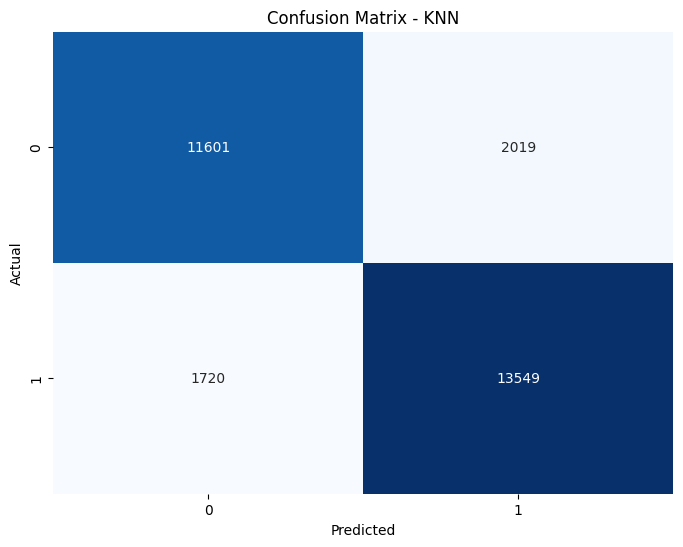

In [9]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

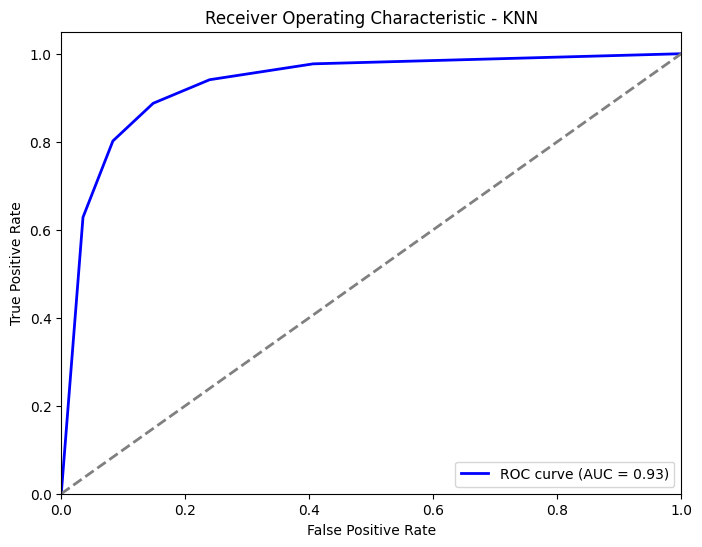

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score
# Convert target variable to binary labels
y_test_binary = np.where(y_test == 'successful', 1, 0)

# Calculate ROC curve and AUC
y_probs = knn_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = roc_auc_score(y_test_binary, y_probs)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - KNN')
plt.legend(loc="lower right")
plt.show()

# Naive-Bayes Model

In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Select relevant columns
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8404929211810723


In [63]:
from sklearn.metrics import precision_score, recall_score

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7839147802929427
Recall: 0.9639138122994302


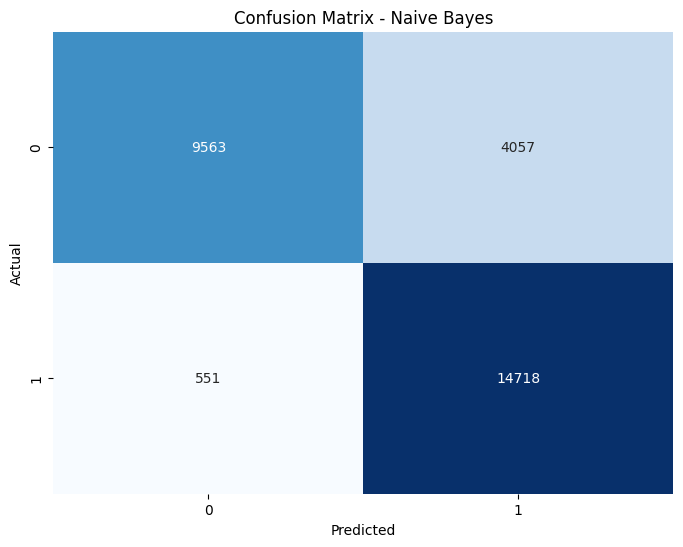

In [87]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

In [ ]:
# Step 7: Evaluate the model and print the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,nb_model.predict_proba(X_test)[:,1])

print("Train Accuracy: {:.2f}".format(nb_model.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("ROC AUC Score: {:.2f}".format(roc_auc))

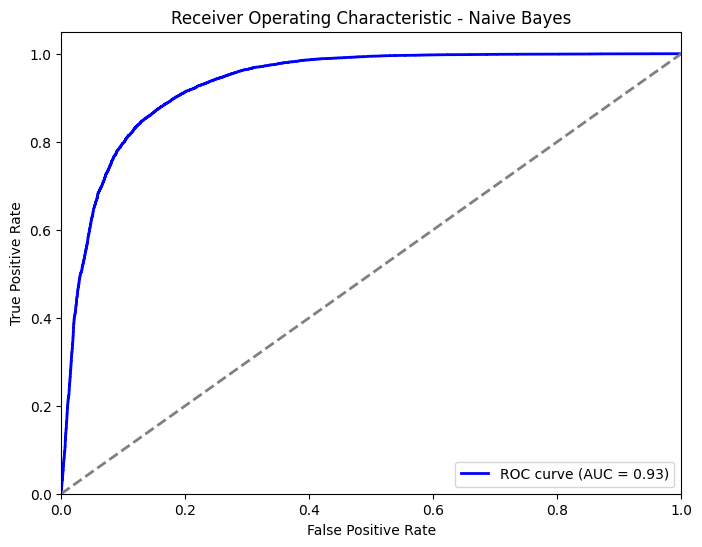

In [12]:
#Convert target variable to binary labels
y_test_binary = np.where(y_test == 'successful', 1, 0)

# Calculate ROC curve and AUC
y_probs = nb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_binary, y_probs)
roc_auc = roc_auc_score(y_test_binary, y_probs)

# Visualize ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.legend(loc="lower right")
plt.show()

# Decision Tree Model

In [64]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Select relevant columns
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Convert target variable to binary labels
y_binary = np.where(y == 'successful', 1, 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Build a Decision Tree model (Gini)
dt_gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini_model.fit(X_train, y_train)

# Build a Decision Tree model (Entropy)
dt_entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [20]:
# Predict on the test set for Gini model
y_pred_gini = dt_gini_model.predict(X_test)

# Calculate accuracy for Gini model
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy (Gini):", accuracy_gini)

Accuracy (Gini): 0.8388313891100418


In [21]:
# Calculate confusion matrix for Gini model
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix (Gini):\n", conf_matrix_gini)


Confusion Matrix (Gini):
 [[11413  2207]
 [ 2449 12820]]


In [22]:
# Predict on the test set for Entropy model
y_pred_entropy = dt_entropy_model.predict(X_test)

# Calculate accuracy for Entropy model
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)

Accuracy (Entropy): 0.840215999169234


In [23]:
# Calculate confusion matrix for Entropy model
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
print("Confusion Matrix (Entropy):\n", conf_matrix_entropy)

Confusion Matrix (Entropy):
 [[11418  2202]
 [ 2414 12855]]


In [ ]:
# Step 7: Evaluate the model and print the scores
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,nb_model.predict_proba(X_test)[:,1])

print("Train Accuracy: {:.2f}".format(nb_model.score(X_train, y_train)))
print("Test Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("ROC AUC Score: {:.2f}".format(roc_auc))

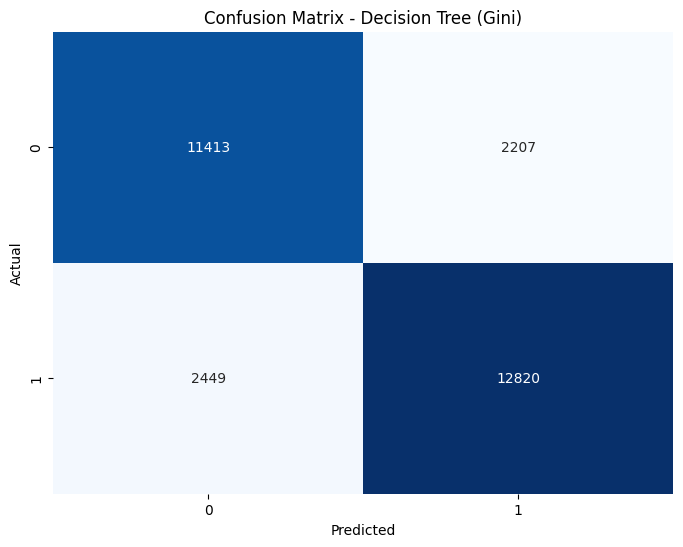

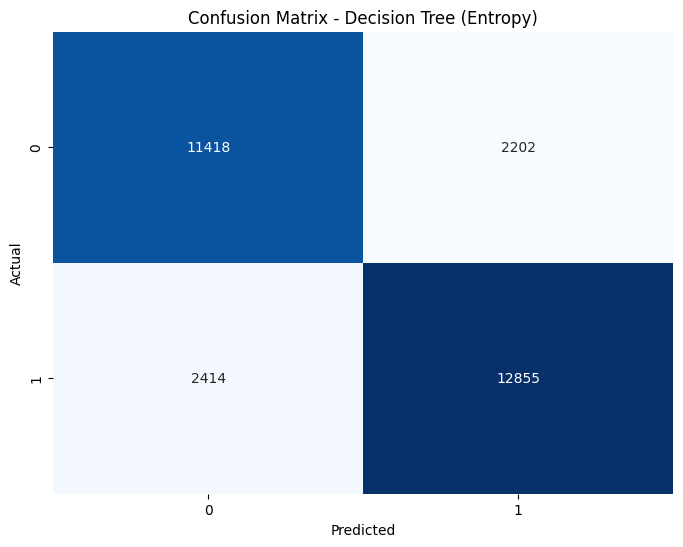

In [25]:
# Plot confusion matrix for Gini model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Gini)')
plt.show()

# Plot confusion matrix for Entropy model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree (Entropy)')
plt.show()

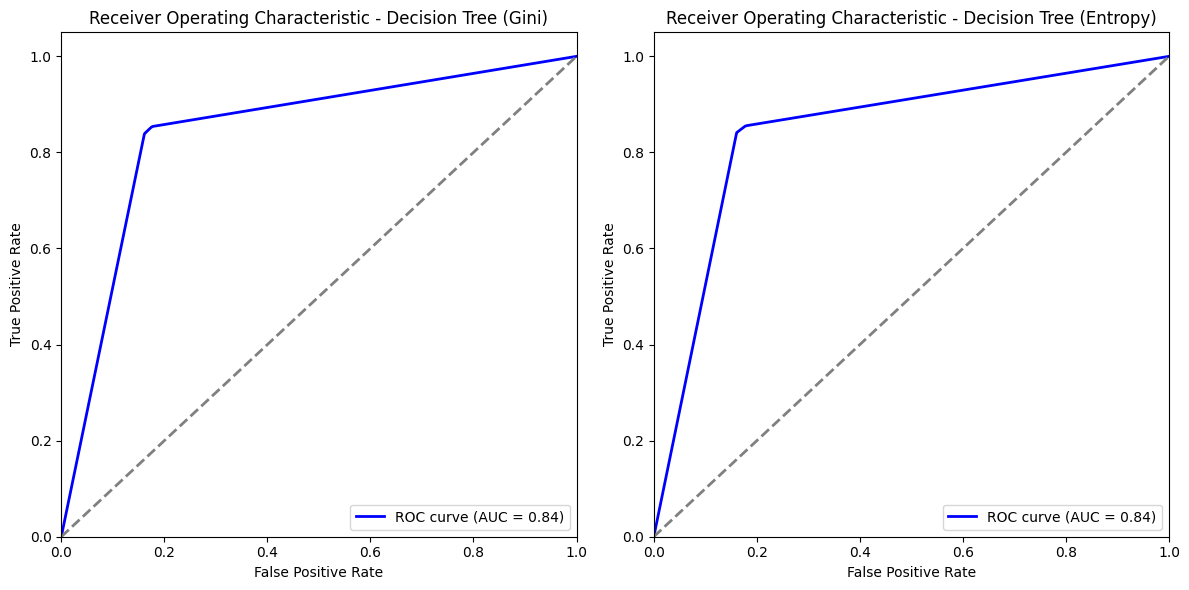

In [24]:
# Calculate ROC curve and AUC for Gini model
y_probs_gini = dt_gini_model.predict_proba(X_test)[:, 1]
fpr_gini, tpr_gini, thresholds_gini = roc_curve(y_test, y_probs_gini)
roc_auc_gini = roc_auc_score(y_test, y_probs_gini)

# Calculate ROC curve and AUC for Entropy model
y_probs_entropy = dt_entropy_model.predict_proba(X_test)[:, 1]
fpr_entropy, tpr_entropy, thresholds_entropy = roc_curve(y_test, y_probs_entropy)
roc_auc_entropy = roc_auc_score(y_test, y_probs_entropy)

# Visualize ROC curves
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr_gini, tpr_gini, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gini)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree (Gini)')
plt.legend(loc="lower right")

plt.subplot(1, 2, 2)
plt.plot(fpr_entropy, tpr_entropy, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_entropy)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Decision Tree (Entropy)')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# Random Forest Model

In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score

# Select relevant columns
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)


Accuracy: 0.8767697047319049
Precision: 0.8785155492338527
Recall: 0.8899076560351038


Confusion Matrix:
[[11741  1879]
 [ 1681 13588]]


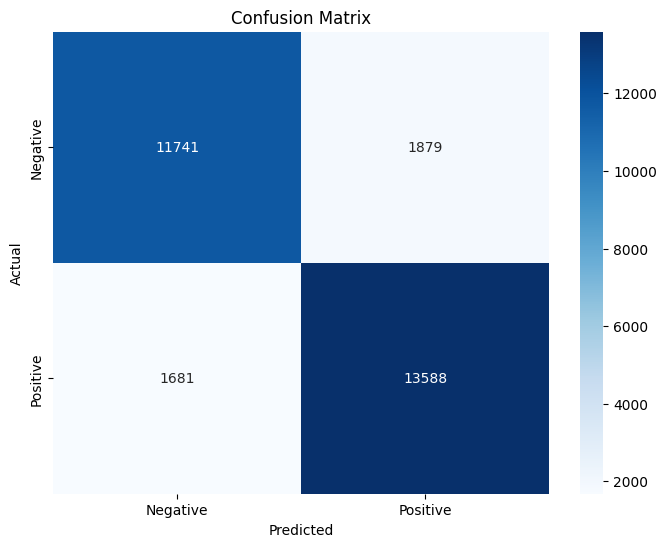

In [71]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

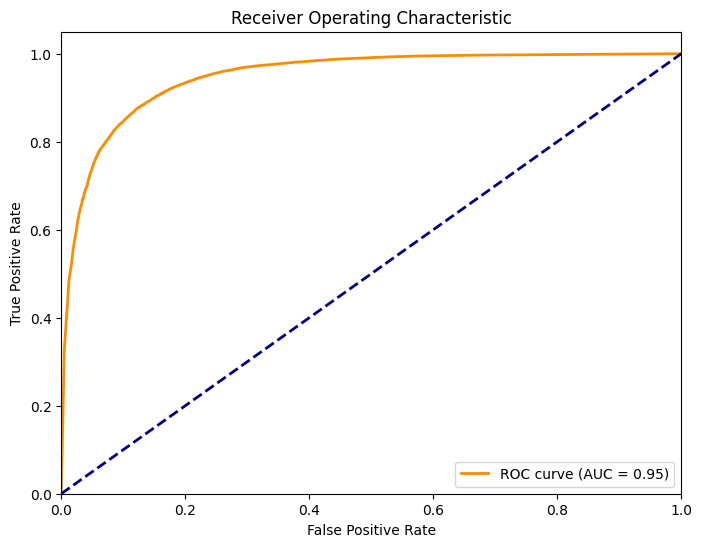

ROC AUC Score: 0.9480922086528722


In [72]:
# Predict probabilities on the test set
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC Score:", roc_auc)

# ADA Boost Model

In [74]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Select relevant columns
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an AdaBoost model
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ada_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate ROC AUC score
y_pred_prob = ada_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8894388867735125
Precision: 0.8818544051609639
Recall: 0.9131573776933657
ROC AUC Score: 0.9570064460263225


Confusion Matrix (AdaBoost):
 [[11752  1868]
 [ 1326 13943]]


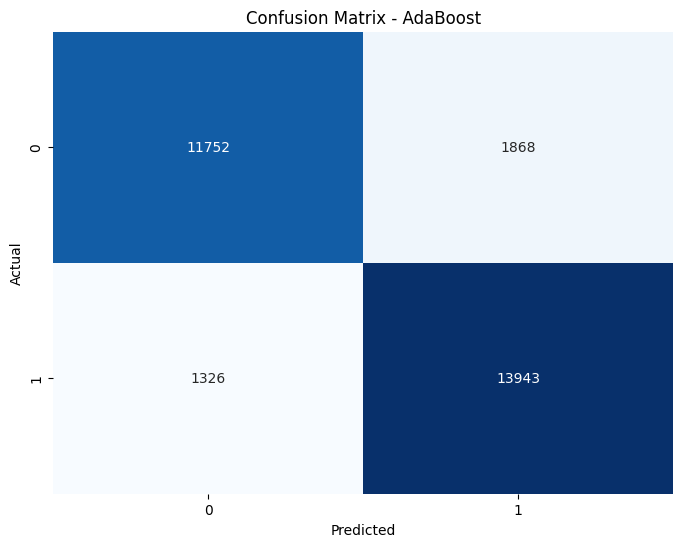

In [30]:
# Calculate confusion matrix for AdaBoost model
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)
print("Confusion Matrix (AdaBoost):\n", conf_matrix_adaboost)
# Plot confusion matrix for AdaBoost model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_adaboost, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

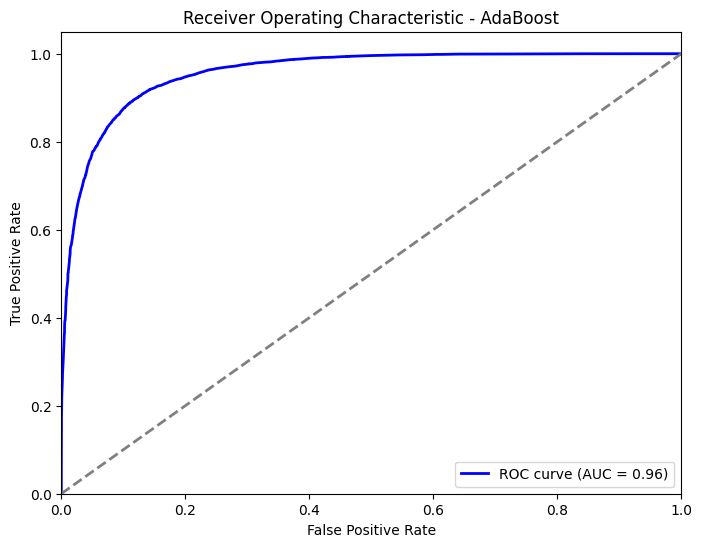

In [31]:
# Calculate ROC curve and AUC for AdaBoost model
y_probs_adaboost = adaboost_model.predict_proba(X_test)[:, 1]
fpr_adaboost, tpr_adaboost, thresholds_adaboost = roc_curve(y_test, y_probs_adaboost)
roc_auc_adaboost = roc_auc_score(y_test, y_probs_adaboost)

# Visualize ROC curve for AdaBoost model
plt.figure(figsize=(8, 6))
plt.plot(fpr_adaboost, tpr_adaboost, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_adaboost)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.legend(loc="lower right")
plt.show()

# Gradient Boost Model

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Select relevant columns
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = gb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate ROC AUC score
y_pred_prob = gb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.8907542663297449
Precision: 0.8870215349223592
Recall: 0.9090968629248805
ROC AUC Score: 0.9592222068669842


Confusion Matrix:
[[11852  1768]
 [ 1388 13881]]


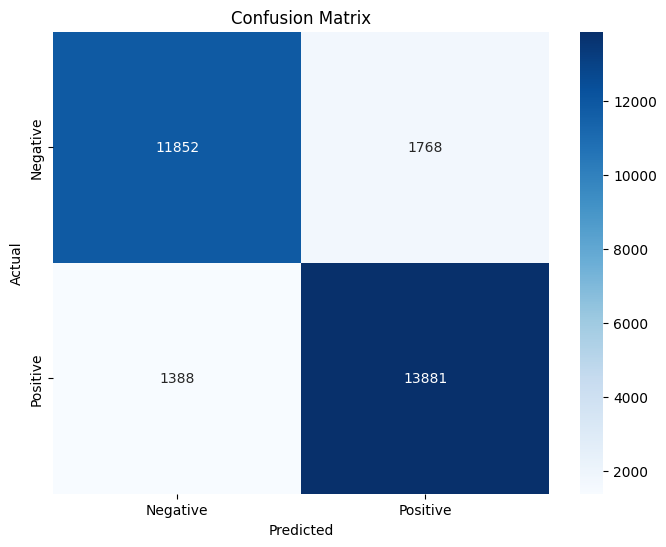

In [76]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Predict probabilities on the test set
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("ROC AUC Score:", roc_auc)

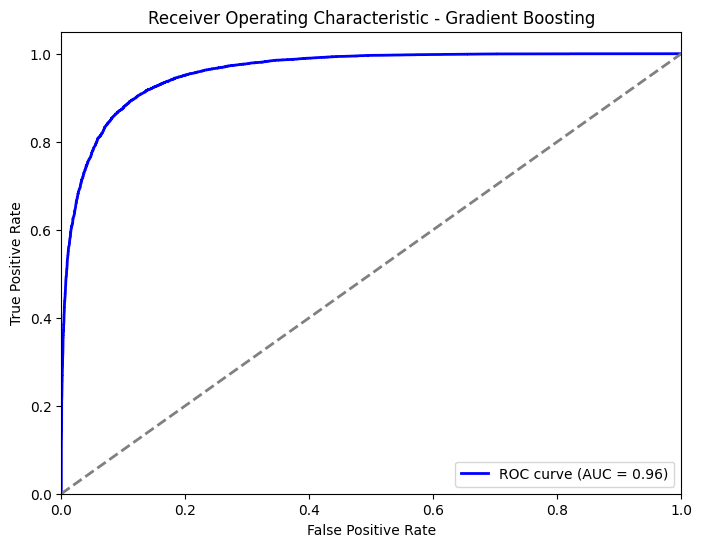

In [77]:
# Calculate ROC curve and AUC for Gradient Boosting model
y_probs_gb = gb_model.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_probs_gb)
roc_auc_gb = roc_auc_score(y_test, y_probs_gb)

# Visualize ROC curve for Gradient Boosting model
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Gradient Boosting')
plt.legend(loc="lower right")
plt.show()

# XG Boost Model

Confusion Matrix:
[[11884  1736]
 [ 1436 13833]]


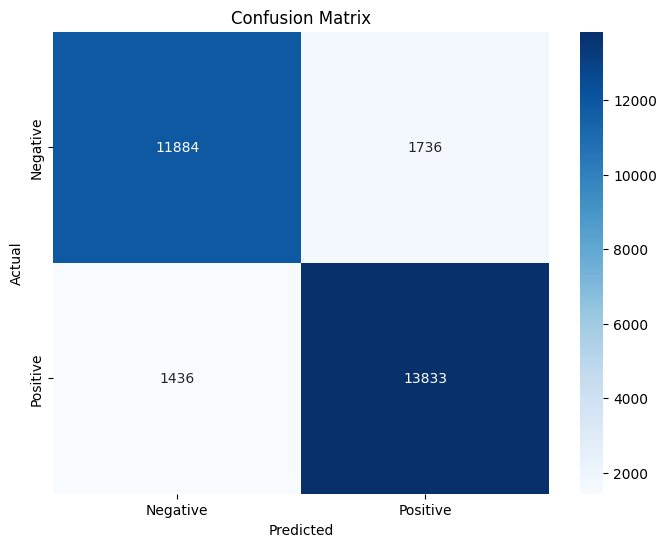

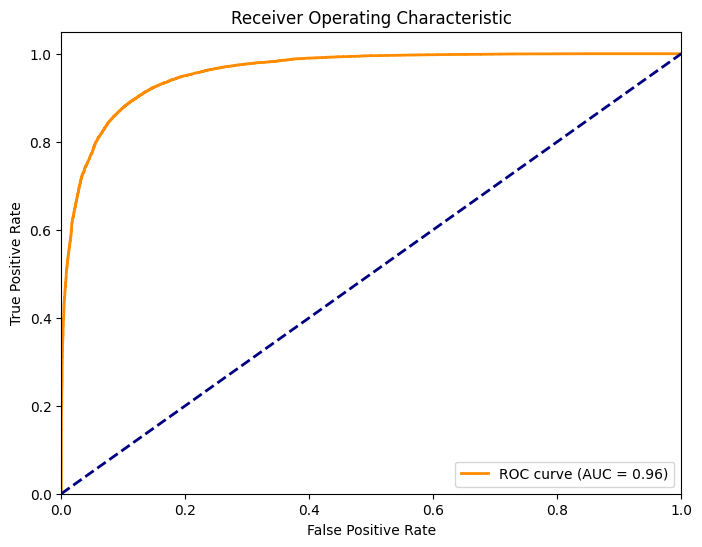

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate',
                    'country', 'quarter', 'usd_goal', 'inflation rate', 'state']

# Create a new DataFrame with selected columns
selected_data = df[selected_columns]

# Convert categorical columns to one-hot encoding
selected_data = pd.get_dummies(selected_data, columns=['Major Cat', 'country', 'quarter'], drop_first=True)

# Split data into features (X) and target (y)
X = selected_data.drop('state', axis=1)
y = selected_data['state']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build an XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [79]:
# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate ROC AUC score
y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8902004223060681
Precision: 0.8884963709936412
Recall: 0.9059532385879887
ROC AUC Score: 0.9590611139112782


# GridSearchCV

In [28]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [29]:
# Assuming your DataFrame is named 'df'
selected_columns = ['backer_goal', 'Major Cat', 'backers', 'employment rate', 'country', 'quarter', 'usd_goal', 'inflation rate', 'state']
df = df[selected_columns]


In [30]:
label_encoders = {}
categorical_columns = ['Major Cat', 'country', 'quarter', 'state']

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [31]:
X = df.drop(columns=['state'])  # Features
y = df['state']  # Target variable


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
gb_model = GradientBoostingClassifier()

param_grid = {
    'n_estimators': [100, 200, 300],  # You can adjust the values as needed
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, scoring='accuracy', cv=5)


In [34]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [35]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [36]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Parameters: {best_params}")
print(f"Accuracy on Test Data: {accuracy}")


Best Model Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy on Test Data: 0.8918273391256187


In [37]:
from sklearn.ensemble import GradientBoostingClassifier

best_params = {
    'n_estimators': 200,  # Replace with your best value
    'learning_rate': 0.1,  # Replace with your best value
    'max_depth': 3  # Replace with your best value
}

gb_model = GradientBoostingClassifier(**best_params)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)


In [44]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.5f}")


Accuracy: 0.89183


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Precision: 0.89
Recall: 0.89
F1-Score: 0.89


In [40]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[11865  1755]
 [ 1370 13899]]


In [42]:
train_score = gb_model.score(X_train, y_train)
test_score = gb_model.score(X_test, y_test)

print(f"Train Score: {train_score:.2f}")
print(f"Test Score: {test_score:.2f}")


Train Score: 0.89
Test Score: 0.89


# Results-Summary of Different Models

In [ ]:
**********************************************************************************************************************

In [ ]:
*********************************************************************************************************************

# Comparison between base Model and Final Model

Base Model (Logistic Regression):
Train Accuracy: 0.99
Test Accuracy: 1.00
Precision: 0.99
Recall: 1.00
ROC AUC Score: 1.00
The base model's performance metrics, especially Test Accuracy, Precision, Recall, and ROC AUC Score, are exceptionally high. This suggests that the Logistic Regression model is performing nearly perfectly on your dataset. While these results are excellent, it's worth considering whether your Logistic Regression model is potentially overfitting, as such high test accuracy and precision can be indicative of overfitting.

Final Model (Gradient Boosting):
Accuracy: 89.183%
Precision: 0.89
Recall: 0.89
F1-Score: 0.89
Train Score: 0.89
Test Score: 0.89
The final model, a Gradient Boosting model, provides good performance, but the metrics are not as perfect as those of the base model. The accuracy, precision, and recall are around 89%, which is still a very good performance for most practical purposes.

In this case, it's possible that the Logistic Regression model overfit the data, which is why it showed almost perfect performance on the training and test data. Gradient Boosting, on the other hand, is typically less prone to overfitting and provides a more realistic assessment of how well the model generalizes to unseen data.

Ultimately, the choice of the "better" model depends on your specific goals. If you are looking for a model that performs exceptionally well on the training data, the base Logistic Regression model might seem superior. However, in most real-world scenarios, the final Gradient Boosting model is likely to be more reliable and robust when dealing with new, unseen data.

It's essential to consider the potential trade-off between model complexity and generalization to make an informed decision about which model is best suited for your specific use case